# Importing

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

# Orignal Image

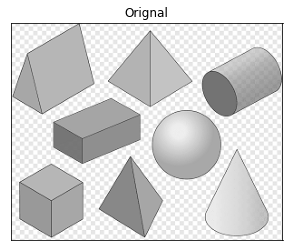

In [41]:
img = cv.imread('shapes.png',0)
plt.title("Orignal")
plt.xticks([])
plt.yticks([])
plt.imshow(img,cmap = 'gray')

# Finding Threshold

In [42]:
Told = img.mean()
while True:
    Group1 = (img > Told) * img
    Group2 = (img <= Told) * img
    mean1 = Group1.mean()
    mean2 = Group2.mean()
    Tnew = (mean1 + mean2)/2
    if((Tnew - Told) < 1e-7):
        break
    else:
        Told = Tnew

#  Truncate Thresholding

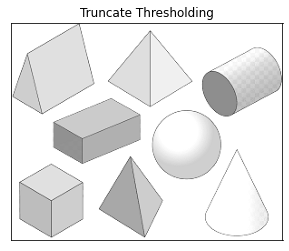

In [45]:
T = Told
r,c = img.shape[0],img.shape[1]
truncate_img = np.zeros((r,c))
for i in range(r):
    for j in range(c):
        if(img[i,j] > T):
            truncate_img[i,j] = T
        else:
            truncate_img[i,j] = img[i,j]
cv.imwrite("Truncate_Img.png",truncate_img)
plt.title("Truncate Thresholding")
plt.xticks([])
plt.yticks([])
plt.imshow(truncate_img,cmap = 'gray')

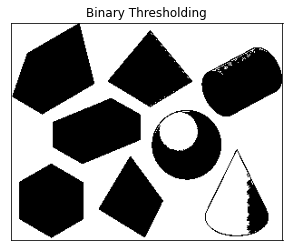

In [46]:
binary_img= np.zeros((r,c),np.uint8)
for i in range(r):
    for j in range(c):
        if(img[i,j] >= T):
            binary_img[i,j] = 255
        else:
            binary_img[i,j]=0
plt.title("Binary Thresholding")
plt.xticks([])
plt.yticks([])
plt.imshow(binary_img,cmap = 'gray')

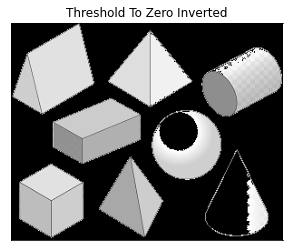

In [38]:
THZI_img= np.zeros((r,c),np.uint8)
for i in range(r):
    for j in range(c):
        if(img[i,j] > T):
            THZI_img[i,j] = 0
        else:
            THZI_img[i,j]=img[i,j]
plt.title("Threshold To Zero Inverted")
plt.xticks([])
plt.yticks([])
plt.imshow(THZI_img,cmap = 'gray')

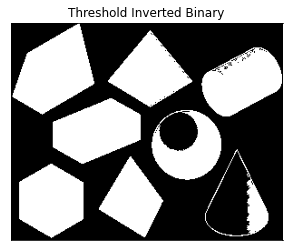

In [47]:
THIB_img= np.zeros((r,c),np.uint8)
#   Now by using the found threshold, binarize the image
for i in range(r):
    for j in range(c):
        if(img[i,j] > T):
            THIB_img[i,j] = 0
        else:
            THIB_img[i,j]=1
plt.title("Threshold Inverted Binary")
plt.xticks([])
plt.yticks([])
plt.imshow(THIB_img,cmap = 'gray')